In [2]:
import pandas as pd

In [30]:
import numpy as np

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

### import data

In [98]:
data = pd.read_csv('WCMC.csv')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 19 columns):
Identifier    3332 non-null object
I-c-1         3329 non-null float64
I-c-2         3332 non-null int64
I-c-3         3332 non-null int64
I-e-1         3329 non-null float64
I-e-2         3332 non-null int64
I-e-3         3332 non-null int64
II-c-1        3332 non-null int64
II-c-2        3332 non-null int64
II-c-3        3332 non-null int64
II-e-1        3331 non-null float64
II-e-2        3332 non-null int64
II-e-3        3332 non-null int64
III-c-1       3332 non-null int64
III-c-2       3332 non-null int64
III-c-3       3332 non-null int64
III-e-1       3332 non-null int64
III-e-2       3330 non-null float64
III-e-3       3332 non-null int64
dtypes: float64(4), int64(14), object(1)
memory usage: 494.7+ KB


In [100]:
data.head()

,Identifier,I-c-1,I-c-2,I-c-3,I-e-1,I-e-2,I-e-3,II-c-1,II-c-2,II-c-3,II-e-1,II-e-2,II-e-3,III-c-1,III-c-2,III-c-3,III-e-1,III-e-2,III-e-3
0,5.82_341.28,77314.0,50155,94257,65364.0,89864,39437,58990,36417,43430,45108.0,59655,54428,42072,42608,42500,52728,46389.0,49503
1,5.82_339.26,231763.0,191281,265610,203871.0,251915,169226,149271,149378,128976,139834.0,179184,129375,118589,161988,160464,127718,141584.0,118929
2,0.72_120.08,1813.0,1615,2536,26442.0,16627,10248,3709,1672,1724,6503.0,618,10831,4625,2202,1877,9033,4124.0,8884
3,2.53_191.07,79.0,239,62,116.0,145,132,6545,3443,3502,196.0,152,484,1093,1168,1423,286,397.0,328
4,3.94_137.06,202.0,988,654,870.0,713,88,1672,2096,1789,1452.0,979,1275,1361,2417,1391,1317,1483.0,1772


In [101]:
data = data.iloc[:, 1:]

In [102]:
cols = data.columns.tolist()

### separate cell vs. extracellular

In [103]:
c_cols = [item for item in cols if ('c' in item) or (item == 'Identifier')]

In [104]:
c_cols

['I-c-1',
 'I-c-2',
 'I-c-3',
 'II-c-1',
 'II-c-2',
 'II-c-3',
 'III-c-1',
 'III-c-2',
 'III-c-3']

In [105]:
e_cols = [item for item in cols if ('e' in item) or (item == 'Identifier')]

In [106]:
e_cols

['I-e-1',
 'I-e-2',
 'I-e-3',
 'II-e-1',
 'II-e-2',
 'II-e-3',
 'III-e-1',
 'III-e-2',
 'III-e-3']

In [107]:
data_c = data.loc[:, c_cols]

In [108]:
data_e = data.loc[:, e_cols]

In [111]:
data_c = data_c.T

In [254]:
data_e = data_e.T

### preprocessing

In [42]:
# apply log transform on the very unbalanced columns
    # columns_to_transform =  c_cols[1:]

In [113]:
data_c = np.log(data_c + 0.01)

In [255]:
data_e = np.log(data_e + 0.01)

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#scaling 

In [115]:
c_scaled = StandardScaler().fit_transform(data_c)

In [256]:
e_scaled = StandardScaler().fit_transform(data_e)

In [52]:
from sklearn.decomposition import PCA

In [116]:
c_scaled.shape

(9, 3332)

In [118]:
c_scaled[np.isnan(c_scaled)] = 0

In [119]:
np.sum(np.isnan(c_scaled))

0

In [257]:
e_scaled.shape

(9, 3332)

In [258]:
e_scaled[np.isnan(e_scaled)] = 0

In [259]:
np.sum(np.isnan(c_scaled))

0

### pca

In [120]:
pca = PCA(n_components=4)
c_transformed = pca.fit_transform(c_scaled)

([<matplotlib.axis.XTick at 0x22fdda6ac48>,
 <a list of 4 Text xticklabel objects>)

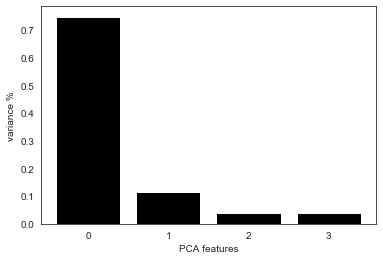

In [121]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [122]:
c_transformed.shape

(9, 4)

In [123]:
# Save components to a DataFrame
ctransformed = pd.DataFrame(c_transformed)

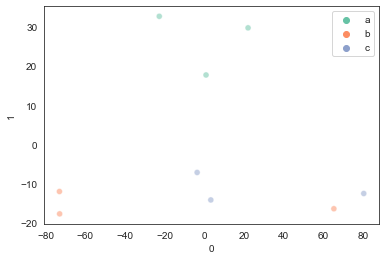

In [151]:
sns.scatterplot(ctransformed[0], ctransformed[1], palette='Set2', hue = cols, alpha=0.5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'color'

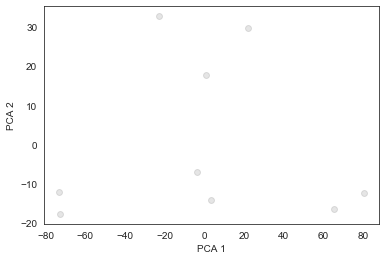

In [150]:
plt.scatter(ctransformed[0], ctransformed[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.color(cols)

### kmeans

In [125]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'SSE')

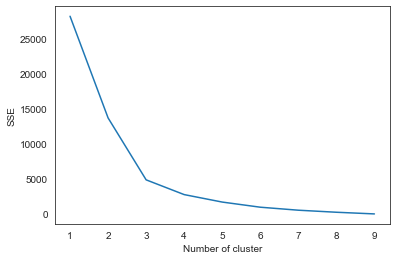

In [126]:
sse = {}
for k in range(1, 10):
    clf = KMeans(n_clusters=k).fit(c_transformed)
    sse[k] = clf.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

fig,ax = plt.subplots()
ax.plot(list(sse.keys()), list(sse.values()))
ax.set_xlabel("Number of cluster")
ax.set_ylabel("SSE")

In [127]:
km = KMeans(n_clusters=3).fit(c_transformed)

In [130]:
ctransformed.head()

,0,1,2,3
0,-22.656233,32.686937,-3.723087,7.610152
1,0.912733,17.709390,-11.817891,-17.223478
2,22.093989,29.742289,13.884865,-0.766687
3,65.347900,-16.436235,6.523655,-13.981140
4,-72.879660,-17.745686,0.032208,-9.804800


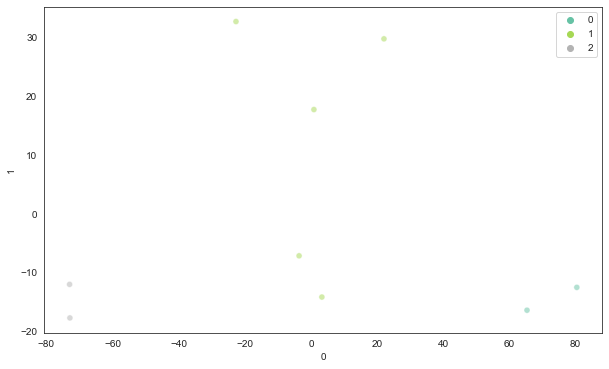

In [128]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(ctransformed.iloc[:, 0], ctransformed.iloc[:, 1], hue=km.labels_, palette='Set2', alpha=0.5)

### GM clustering 

In [78]:
from sklearn.mixture import GaussianMixture

In [131]:
gmm = GaussianMixture(n_components=3).fit(c_scaled)

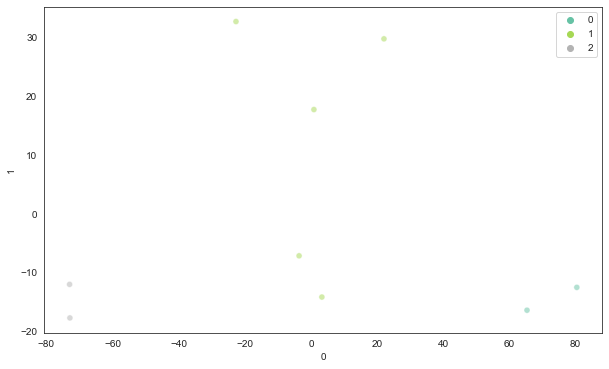

In [132]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(ctransformed.iloc[:, 0], ctransformed.iloc[:, 1], hue=gmm.fit_predict(c_scaled), palette='Set2', alpha=0.5)

### UMAP +  AgglomerativeClustering

In [133]:
from umap import UMAP
import random

random.seed(23)

In [136]:
um = UMAP(n_neighbors=3,
          min_dist=1,
          metric='cosine'
         )
components = um.fit_transform(c_scaled)

In [139]:
components.shape

(9, 2)

In [147]:
c_cols

['I-c-1',
 'I-c-2',
 'I-c-3',
 'II-c-1',
 'II-c-2',
 'II-c-3',
 'III-c-1',
 'III-c-2',
 'III-c-3']

In [148]:
cols = ['a','a','a','b','b','b','c','c','c']

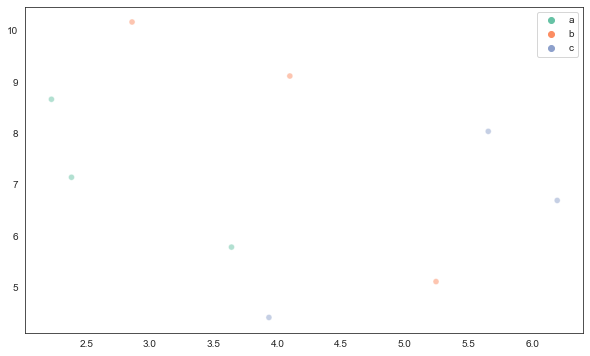

In [149]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(components[:, 0], components[:, 1], palette='Set2', hue = cols, alpha=0.5)

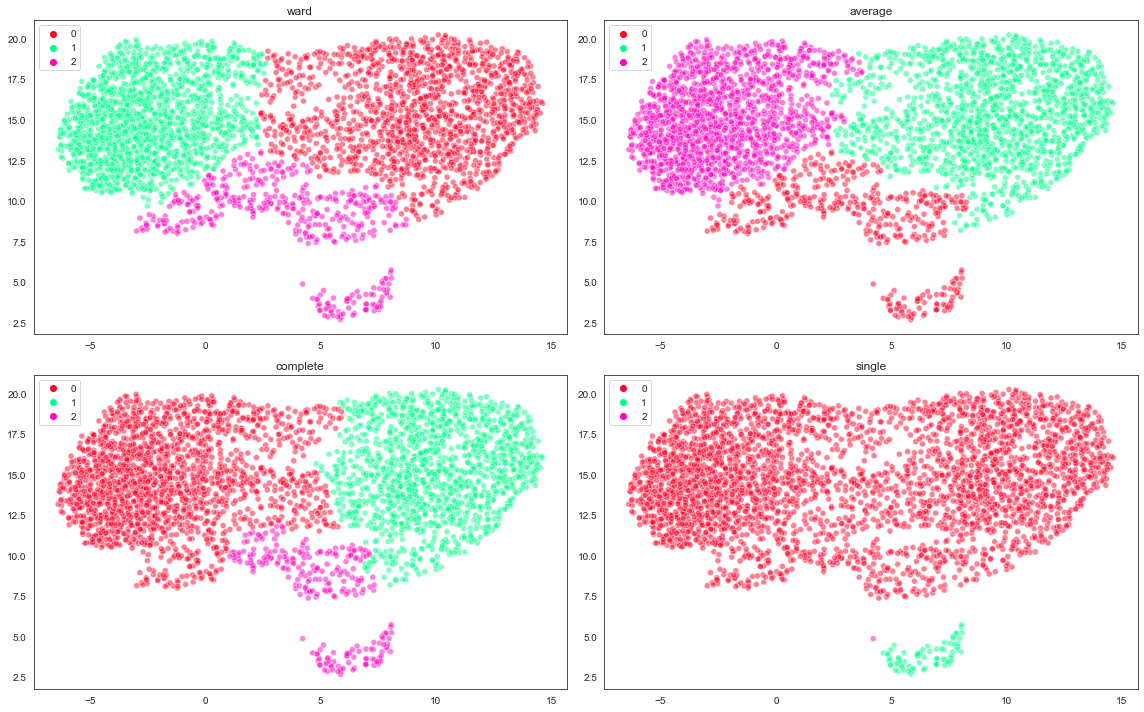

In [84]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3

linkages = ['ward', 'average', 'complete', 'single']
fig, axes = plt.subplots(figsize=(16, 10), ncols=2, nrows=2)
axes = axes.ravel()

for ax,linkage in zip(axes, linkages):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    clustering.fit(components)
    sns.scatterplot(components[:, 0], components[:, 1], hue=clustering.labels_, palette='gist_rainbow', alpha=0.5, ax=ax)
    ax.set_title(linkage)
    
plt.tight_layout()

### PLSDA

Cluster analysis told us that just define a “distances” to measure the similarity between samples.

__Principal components analysis__ produces the weight matrix reflecting the covariance structure between the variables, while __partial least squares__ produces the weight matrix reflecting the covariance structure __between the variables and classes__. After rotation by weight matrix, the new variables would contain relationship with classes.


https://bookdown.org/yufree/Metabolomics/common-analysis-methods-for-metabolomics.html#plsda
https://fiehnlab.ucdavis.edu/staff/kind/statistics/concepts/opls-plsda


In [152]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [156]:
c_scaled.shape

(9, 3332)

In [157]:
c_cols

['I-c-1',
 'I-c-2',
 'I-c-3',
 'II-c-1',
 'II-c-2',
 'II-c-3',
 'III-c-1',
 'III-c-2',
 'III-c-3']

In [260]:
e_scaled.shape

(9, 3332)

In [261]:
e_cols

['I-e-1',
 'I-e-2',
 'I-e-3',
 'II-e-1',
 'II-e-2',
 'II-e-3',
 'III-e-1',
 'III-e-2',
 'III-e-3']

In [168]:
# Define PLS object
pls = PLSRegression(n_components=5)

In [160]:
cols = [1,1,1,2,2,2,3,3,3]

In [166]:
dummy=np.array([[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1]]).T

In [262]:
dummy

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [263]:
#pls.fit(c_scaled, dummy)

In [264]:
#plt.figure(figsize=(12, 8))
#plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
#            marker="*", c="b", s=50)
#plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
#            marker="*", c="r", s=50)
#plt.xlabel("X comp. 1")
#plt.ylabel("X comp. 2")
#plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
#          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
#plt.legend(loc="best")
#plt.xticks(())
#plt.yticks(())

In [172]:
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

In [184]:
plsca = PLSCanonical(n_components=3)
plsca.fit(c_scaled, dummy)

C:\Users\diane.dou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 2
  warnings.warn('Y residual constant at iteration %s' % k)


PLSCanonical(algorithm='nipals', copy=True, max_iter=500, n_components=3,
             scale=True, tol=1e-06)

In [272]:
X_train_r, Y_train_r = plsca.transform(c_scaled, dummy)

In [198]:
X_train_r[:,0]

array([ 13.21509037,  -2.88719584, -20.22758677, -46.78910764,
        67.23366905,  67.11843616, -68.9999983 ,  -5.55715135,
        -3.10615567])

In [200]:
X_train_r[:,1]

array([-30.06836096, -19.39764272, -27.14635688,  15.57933072,
        13.7344501 ,  10.4361044 ,  14.5036367 ,  13.25279031,
         9.10604833])

In [210]:
cols = [1,1,1,2,2,2,3,3,3]

In [202]:
cols = ['a','a','a','b','b','b','c','c','c']

In [273]:
# fig,ax = plt.subplots(figsize=(10, 6))
# sns.scatterplot(X_train_r[:, 0], X_train_r[:, 1], palette='Set1', hue = cols, alpha=0.5)

In [214]:
from matplotlib.patches import Ellipse

In [217]:
import matplotlib.transforms as transforms

In [270]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*
    "https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html"

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

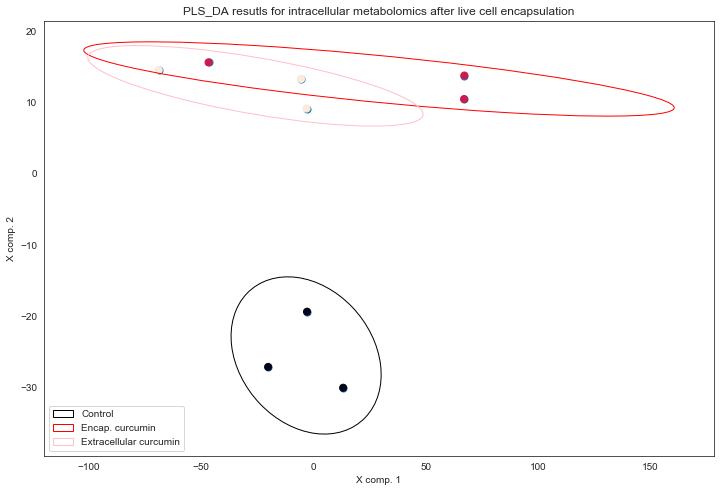

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.scatter(X_train_r[:, 0], X_train_r[:, 1], s=50)


confidence_ellipse(X_train_r[:3, 0], X_train_r[:3, 1], ax, edgecolor='black')
confidence_ellipse(X_train_r[3:6, 0], X_train_r[3:6, 1], ax, edgecolor='red')
confidence_ellipse(X_train_r[6:9, 0], X_train_r[6:9, 1], ax, edgecolor='pink')

ax.scatter(X_train_r[:, 0], X_train_r[:, 1], c= cols, s=50)
ax.set_title("PLS_DA resutls for intracellular metabolomics after live cell encapsulation")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.legend(['Control', 'Encap. curcumin', 'Extracellular curcumin'])
plt.show()

In [275]:
plt.savefig('intra.png')

<Figure size 432x288 with 0 Axes>

In [164]:
# Cross-validation
# y_cv = cross_val_predict(pls, c_scaled, cols, cv=3)

In [ ]:
# Calculate scores
# score = r2_score(y, y_cv)
# mse = mean_squared_error(y, y_cv)

### Extracellular metabolomics

In [184]:
plsca = PLSCanonical(n_components=3)
plsca.fit(c_scaled, dummy)

C:\Users\diane.dou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 2
  warnings.warn('Y residual constant at iteration %s' % k)


PLSCanonical(algorithm='nipals', copy=True, max_iter=500, n_components=3,
             scale=True, tol=1e-06)

In [276]:
X_train_r, Y_train_r = plsca.transform(e_scaled, dummy)

In [267]:
X_train_r[:,0]

array([-16.47417154, -18.06672802, -16.20324951, -14.60118783,
       123.12723249, -26.00769674, -18.85414793,   7.16142761,
       -20.08147853])

In [268]:
X_train_r[:,1]

array([ -6.93905381,  -2.35194034, -14.77644776,   5.42989428,
        -0.64524894,   8.24749262,   5.17609811,   2.61256995,
         3.24663589])

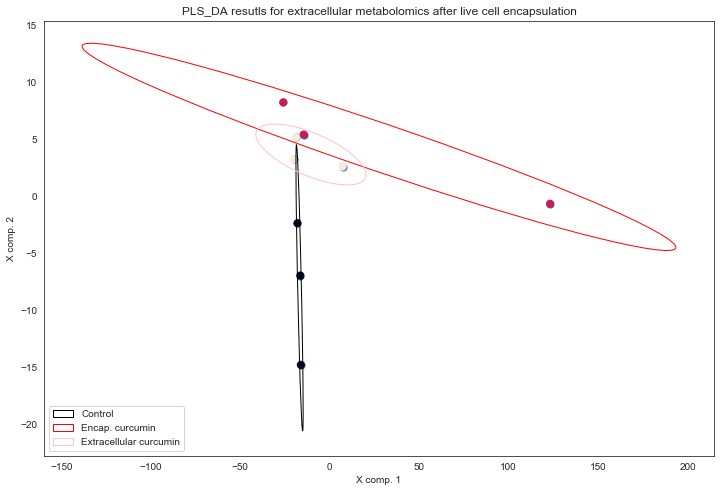

<Figure size 432x288 with 0 Axes>

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.scatter(X_train_r[:, 0], X_train_r[:, 1], s=50)


confidence_ellipse(X_train_r[:3, 0], X_train_r[:3, 1], ax, edgecolor='black')
confidence_ellipse(X_train_r[3:6, 0], X_train_r[3:6, 1], ax, edgecolor='red')
confidence_ellipse(X_train_r[6:9, 0], X_train_r[6:9, 1], ax, edgecolor='pink')

ax.scatter(X_train_r[:, 0], X_train_r[:, 1], c= cols, s=50)
ax.set_title("PLS_DA resutls for extracellular metabolomics after live cell encapsulation")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.legend(['Control', 'Encap. curcumin', 'Extracellular curcumin'])
plt.show()
plt.savefig('foo.pdf')